In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
# Replace 'example.db' with your database file
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the database and load the data into a DataFrame
query = "SELECT * FROM Event"  # Replace table_name with your table
df = pd.read_sql_query(query, connection)
df

# Close the connection
connection.close()



          id       songId      timestamp  playTime
0          1  rbBbQ-jldvQ  1683257493946    170950
1          2  rbBbQ-jldvQ  1683257706634     87147
2          3  Pr3g9TPPuH4  1683257963584    256949
3          4  t2TKqJ2FXGM  1683258177324    213723
4          5  8kvb-pJEeEI  1683258328928    151593
...      ...          ...            ...       ...
43018  43019  2VPAdf9dkmQ  1735524998389    264362
43019  43020  EXmMiBNDVz4  1735525404879    369080
43020  43021  EXmMiBNDVz4  1735525404898    369080
43021  43022  xcprkHw4cd8  1735525599636    194747
43022  43023  xcprkHw4cd8  1735525599667    194747

[43023 rows x 4 columns]


,id,songId,timestamp,playTime
0,1,rbBbQ-jldvQ,1683257493946,170950
1,2,rbBbQ-jldvQ,1683257706634,87147
2,3,Pr3g9TPPuH4,1683257963584,256949
3,4,t2TKqJ2FXGM,1683258177324,213723
4,5,8kvb-pJEeEI,1683258328928,151593
...,...,...,...,...
43018,43019,2VPAdf9dkmQ,1735524998389,264362
43019,43020,EXmMiBNDVz4,1735525404879,369080
43020,43021,EXmMiBNDVz4,1735525404898,369080
43021,43022,xcprkHw4cd8,1735525599636,194747


In [9]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Get the list of all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, connection)

# Iterate through each table and print its contents
for table_name in tables['name']:
    print(f"Contents of table: {table_name}")
    table_data = pd.read_sql_query(f"SELECT * FROM {table_name};", connection)
    print(table_data)
    print("-" * 40)

# Close the connection
connection.close()



Contents of table: android_metadata
  locale
0  en_US
----------------------------------------
Contents of table: Song
               id                               title    artistsText  \
0     rbBbQ-jldvQ                       Back To Black  Amy Winehouse   
1     Pr3g9TPPuH4                You Know I'm No Good  Amy Winehouse   
2     t2TKqJ2FXGM                               Rehab  Amy Winehouse   
3     8kvb-pJEeEI                       Me & Mr Jones  Amy Winehouse   
4     d1QltB3m0Hs              Tears Dry On Their Own  Amy Winehouse   
...           ...                                 ...            ...   
9989  k63KZROKk1w         e:HARDSTONE NATIONAL ANTHEM    Don Toliver   
9990  mfRIXW9drHo                     e:ROCKSTAR GIRL    Don Toliver   
9991  YDLGZCmO6us                    e:LOVE IS A DRUG    Don Toliver   
9992  BTyzwZEVJe8  e:DONNY DARKO (feat. Lil Uzi Vert)    Don Toliver   
9993  jbgsyvuXfxU            e:GEEKED UP (feat. Yeat)    Don Toliver   

     durationTex

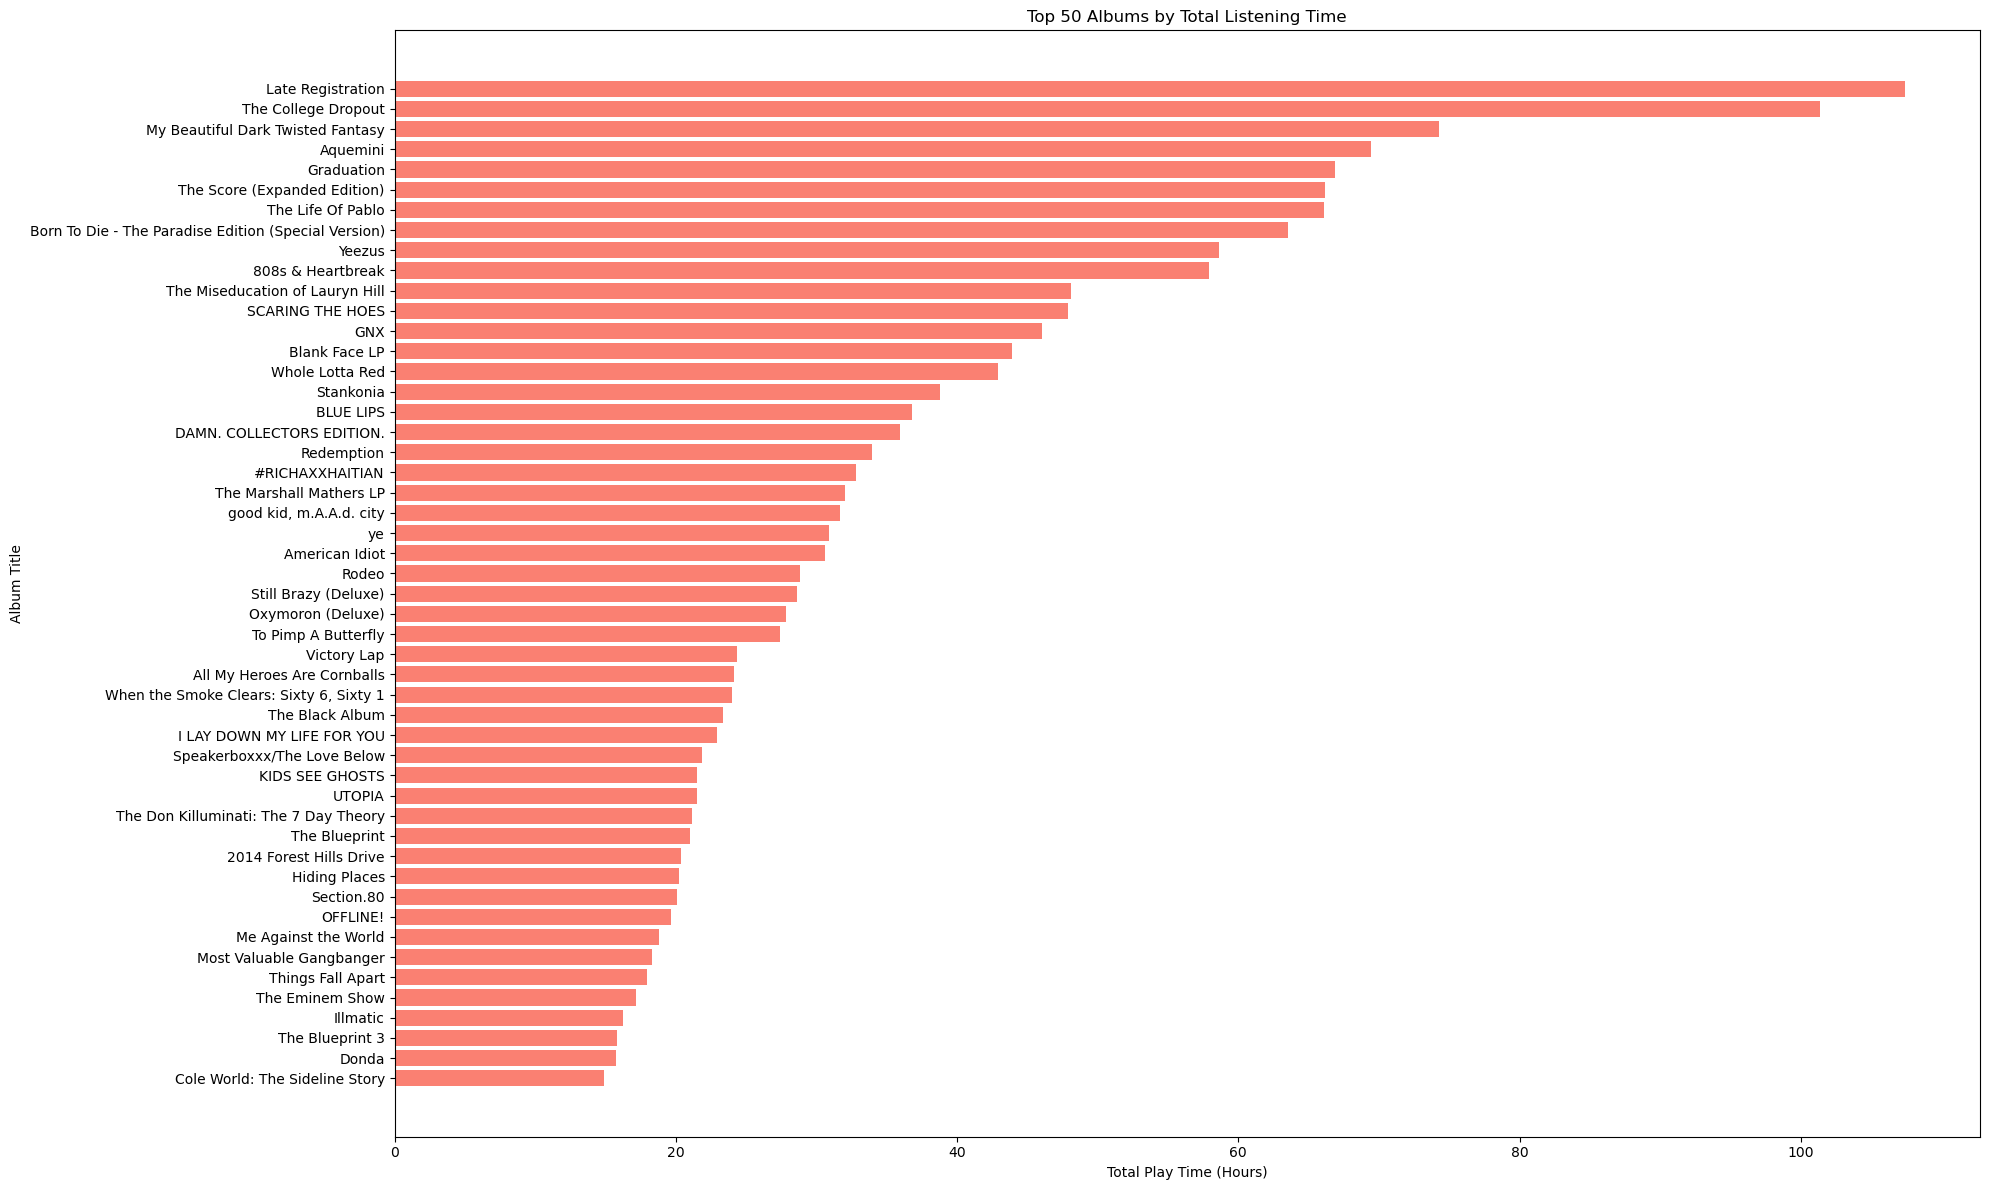

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the data to get album total listening time
query_time = """
SELECT
    Album.title AS album_title,
    SUM(Event.playTime) AS total_play_time_ms
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongAlbumMap ON Song.id = SongAlbumMap.songId
JOIN
    Album ON SongAlbumMap.albumId = Album.id
GROUP BY
    Album.id
ORDER BY
    total_play_time_ms DESC
LIMIT 50;
"""

# Execute the query and fetch the results into a DataFrame
df_time = pd.read_sql_query(query_time, connection)

# Close the database connection
connection.close()

# Convert time from milliseconds to hours for easier readability
df_time['total_play_time_hours'] = df_time['total_play_time_ms'] / (1000 * 60 * 60)

# Plot the data
plt.figure(figsize=(20, 12))
plt.barh(df_time['album_title'], df_time['total_play_time_hours'], color='salmon')
plt.xlabel("Total Play Time (Hours)")
plt.ylabel("Album Title")
plt.title("Top 50 Albums by Total Listening Time")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.tight_layout()
plt.show()